In [7]:
import sys
import os
import xml.etree.ElementTree as ET
import json

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from visual_genome.local import VrRVG

## VrR-VG Dataset

Paper: [VrR-VG: Refocusing Visually-Relevant Relationships](https://arxiv.org/pdf/1902.00313)

In order to be able to run this notebook, you have to have the dataset metadata in `data/VrR-VG` folder. Original dataset was shared in XML format. In the second part of this notebook, I convert the XML content to JSON format (as expected by Visual Genome) and store in `data/VrR-VG` folder.

In [8]:
vrrvg = VrRVG()

Script directory: C:\Users\karab\Desktop\Visual Genome Driver\visual_genome
Data directory: C:\Users\karab\Desktop\Visual Genome Driver\data\VrR-VG
Loading data...
Data loaded.


In [9]:
imgs = vrrvg.IMAGES

In [4]:
vrrvg.get_image_relationships(2354506)

[id: 75215: subject: man predicate: playing with object: wii controller, synset: None,
 id: 75212: subject: bird predicate: top of object: blanket, synset: None,
 id: 75222: subject: blanket predicate: top of object: bed, synset: None,
 id: 75213: subject: painting predicate: hanging on a object: wall, synset: None,
 id: 75216: subject: designs predicate: on other side of object: shirt, synset: None]

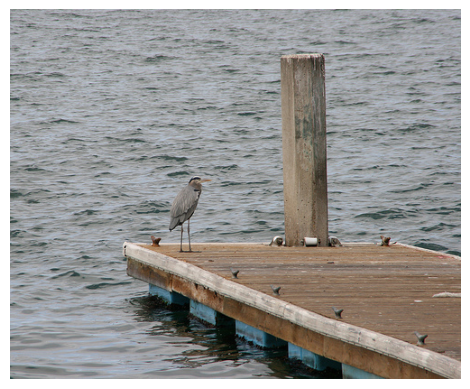

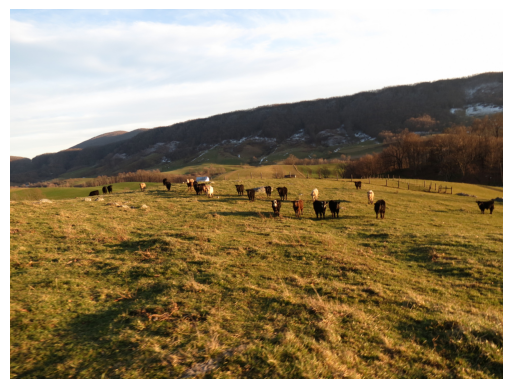

In [5]:
img = vrrvg.sample_images() # sample single image - returns an IMAGE object (you can also sample a list of images by passing a number as an argument)
vrrvg.display_image(img)

## or directly visualize a random image
vrrvg.display_random_image()

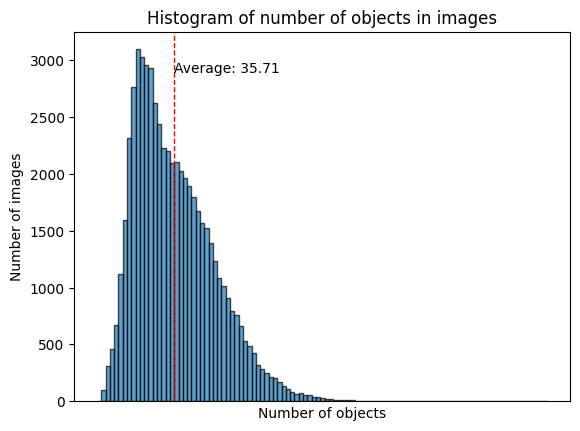

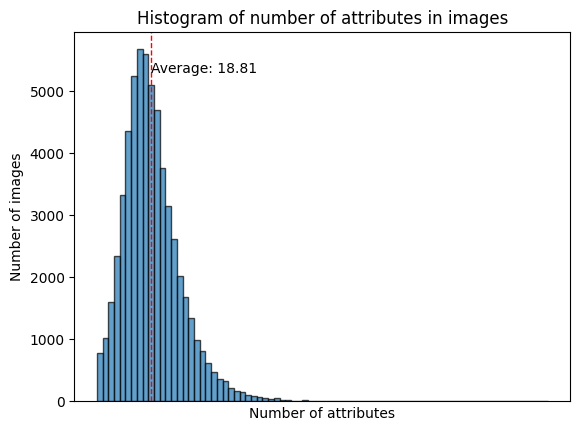

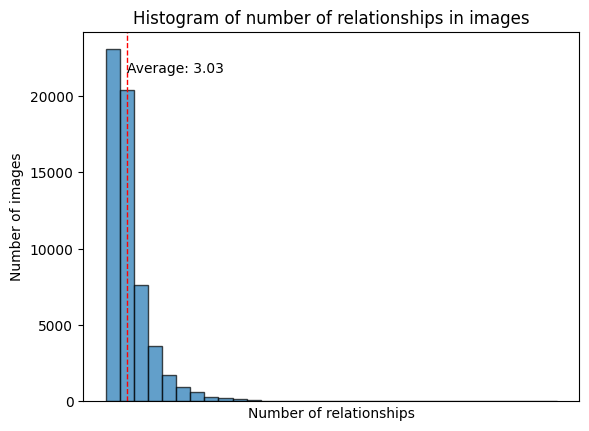

3.031890544733228

In [6]:
vrrvg.histogram("objects") # histogram of objects
vrrvg.histogram("attributes") # histogram of attributes
vrrvg.histogram("relationships") # histogram of relationships

In [22]:
def graphviz(image):
    scene_graph = vrrvg.generate_scene_graph_json(image)

    # save to graph.json
    with open(f"../graphviz/scene_graph.json", "w") as f:
        json.dump(scene_graph, f)

    # run the following command to visualize the scene graph
    # python graphviz/visualize_scene_graph.py

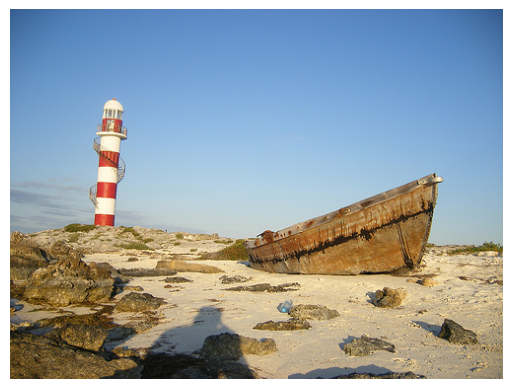

In [27]:
img = vrrvg.sample_images() # sample single image - returns an IMAGE object (you can also sample a list of images by passing a number as an argument)
vrrvg.display_image(img)

graphviz(img.id)

### Features/Correlations

In [10]:
vrrvg.load_sam_results(version=1, sam_file="../sam.json")
vrrvg.load_sam_results(version=2, sam_file="../sam2.json")
vrrvg.load_fc_clip_results(fc_clip_file="../fc_clip.json")

{'2327998': [{'id': 1,
   'isthing': True,
   'category_id': 966,
   'area': 1021.0,
   'category': 'pennant'},
  {'id': 2,
   'isthing': True,
   'category_id': 0,
   'area': 568.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 3,
   'isthing': True,
   'category_id': 0,
   'area': 662.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 4,
   'isthing': True,
   'category_id': 0,
   'area': 712.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 5,
   'isthing': True,
   'category_id': 0,
   'area': 2952.0,
   'category': 'person,child,girl,boy,woman,man,people,children,girls,boys,women,men,lady,guy,ladies,guys,clothes'},
  {'id': 6,
   'isthing': True,
   'category_id': 30,
   'area': 703.0,
   'category': 'skis'},
  {'id': 9,
   'isthing': True,
   'cat

In [11]:
# read complexities
with open("../data/complexities.json", "r") as f:
    complexities = json.load(f)

In [12]:
import json

In [13]:
with open("vrrvg_region_similarities.json", "r") as f:
    region_similarities = json.load(f)

In [14]:
# get all the images with number of objects, attributes and relationships
no_objects = {}
no_attributes = {}
no_relationships = {}
sam = {}
sam2 = {}
fcclip = {}
complexity_map = {}
region_sim_map = {}

for id in imgs:
    no_objects[id] = len(vrrvg.get_image_objects(id))
    no_attributes[id] = len(vrrvg.get_image_attributes(id))
    no_relationships[id] = len(vrrvg.get_image_relationships(id))
    sam[id] = vrrvg.SAM[id]
    sam2[id] = vrrvg.SAM2[id]
    fcclip[id] = vrrvg.FC_CLIP[id]
    complexity_map[id] = complexities[str(id)]
    region_sim_map[id] = region_similarities[str(id)]
    

In [19]:
# measure correlations between no_objects and sam, sam2, fcclip
from scipy.stats import pearsonr

correlation_objects_sam = pearsonr(list(no_objects.values()), list(sam.values()))
correlation_objects_sam2 = pearsonr(list(no_objects.values()), list(sam2.values()))
correlation_objects_fcclip = pearsonr(list(no_objects.values()), list(fcclip.values()))
correlation_sam_complexity = pearsonr(list(sam.values()), list(complexity_map.values()))
correlation_sam2_complexity = pearsonr(list(sam2.values()), list(complexity_map.values()))
correlation_fcclip_complexity = pearsonr(list(fcclip.values()), list(complexity_map.values()))
correlation_avg_region_sim_complexity = pearsonr(list(region_sim_map.values()), list(complexity_map.values()))


print(f"Correlation between number of objects and SAM: {correlation_objects_sam}")
print(f"Correlation between number of objects and SAM2: {correlation_objects_sam2}")
print(f"Correlation between number of objects and FC_CLIP: {correlation_objects_fcclip}")
print(f"Correlation between SAM and complexity: {correlation_sam_complexity}")
print(f"Correlation between SAM2 and complexity: {correlation_sam2_complexity}")
print(f"Correlation between FC_CLIP and complexity: {correlation_fcclip_complexity}")
print(f"Correlation between average region similarity and complexity: {correlation_avg_region_sim_complexity}")

Correlation between number of objects and SAM: PearsonRResult(statistic=0.18012955479927467, pvalue=0.0)
Correlation between number of objects and SAM2: PearsonRResult(statistic=0.11532260600785553, pvalue=9.543060046274748e-174)
Correlation between number of objects and FC_CLIP: PearsonRResult(statistic=0.13584626311854162, pvalue=6.632644256595097e-241)
Correlation between SAM and complexity: PearsonRResult(statistic=0.7866505976551953, pvalue=0.0)
Correlation between SAM2 and complexity: PearsonRResult(statistic=0.5263348876816355, pvalue=0.0)
Correlation between FC_CLIP and complexity: PearsonRResult(statistic=0.5443102042366214, pvalue=0.0)
Correlation between average region similarity and complexity: PearsonRResult(statistic=-0.2603858955380929, pvalue=0.0)


In [20]:
# save everything to vrrvg_features.csv
import csv

with open("../data/vrrvg_features.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["image_id", "# of objects", "# of attributes", "# of relationships", " # of SAM segmentations", "# of SAM2 segmentations", "# of FC-CLIP classes", "Average Region Similarit","Predicted Complexity"])
    for id in imgs:
        writer.writerow([id, no_objects[id], no_attributes[id], no_relationships[id], sam[id], sam2[id], fcclip[id], region_sim_map[id], complexity_map[id]])

### VrR-VG Setup

In [ ]:
# read all the xml files in the folder "../data/VrR-VG"

xmls = []
for file in os.listdir('../data/xmls'):
    if file.endswith('.xml'):
        # add full path
        with open (os.path.join('../data/xmls', file), 'r') as f:
            xmls.append(f.read())

len(xmls)

In [ ]:
def parse_vr_rrg_annotation(xml_string):
    # Parse XML
    root = ET.fromstring(xml_string)
    
    # Initialize dictionaries to store the data
    image_info = {}
    objects = []
    relations = []
    
    # Get basic image information
    image_info['folder'] = root.find('folder').text
    image_info['filename'] = root.find('filename').text
    
    # Get source information
    source = root.find('source')
    image_info['database'] = source.find('database').text
    image_info['image_id'] = source.find('image_id').text
    
    # Get size information
    size = root.find('size')
    image_info['width'] = int(size.find('width').text)
    image_info['height'] = int(size.find('height').text)
    image_info['depth'] = int(size.find('depth').text)
    
    # Get all objects
    for obj in root.findall('object'):
        object_info = {
            'name': obj.find('name').text,
            'object_id': int(obj.find('object_id').text),
            'difficult': int(obj.find('difficult').text),
            'bbox': {
                'xmin': int(obj.find('bndbox/xmin').text),
                'ymin': int(obj.find('bndbox/ymin').text),
                'xmax': int(obj.find('bndbox/xmax').text),
                'ymax': int(obj.find('bndbox/ymax').text)
            },
            'attributes': [attr.text for attr in obj.findall('attribute')]
        }
        objects.append(object_info)
    
    # Get all relations
    for rel in root.findall('relation'):
        relation_info = {
            'subject_id': int(rel.find('subject_id').text),
            'object_id': int(rel.find('object_id').text),
            'predicate': rel.find('predicate').text
        }
        relations.append(relation_info)
    
    return {
        'image_info': image_info,
        'objects': objects,
        'relations': relations
    }

# Example usage:
xml_string = xmls[100] # Put your XML content here
parsed_data = parse_vr_rrg_annotation(xml_string)

# Print some example information
print("Image Information:")
print(parsed_data['image_info'])
print("\nNumber of objects:", len(parsed_data['objects']))
print("\nFirst object:", parsed_data['objects'][0])
print("\nNumber of relations:", len(parsed_data['relations']))
if parsed_data['relations']:
    print("\nFirst relation:", parsed_data['relations'][0]) 

In [5]:
all_images = []
data = {}
for xml in xmls:
    parsed = parse_vr_rrg_annotation(xml)
    data[int(parsed['image_info']['image_id'])] = parsed
    all_images.append(parsed['image_info']['image_id'])

all_images = [int(i) for i in all_images]

In [ ]:
# read region descriptions

with open('../data/VrR-VG/region_descriptions.json', 'r') as f:
    region_descriptions = json.load(f)


In [ ]:
all_images = []
data = []
for xml in xmls:
    parsed = parse_vr_rrg_annotation(xml)
    data.append(parsed)
    all_images.append(parsed['image_info']['image_id'])

all_images = [int(i) for i in all_images]

In [ ]:
data[2376205]

In [10]:
# read region descriptions

with open('../data/VrR-VG/region_descriptions.json', 'r') as f:
    region_descriptions = json.load(f)

In [ ]:
json_ = []
for id in data:
    image = data[id]
    objects = image['objects']
    data_ = {}
    data_['image_id'] = image['image_info']['image_id']
    # https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg
    data_['image_url'] = "https://cs.stanford.edu/people/rak248/" + image['image_info']['folder'] + "/" + image['image_info']['filename']
    data_['objects'] = []
    """
    {'synsets': ['bicycle.n.01'],
    'h': 41,
    'object_id': 5051,
    'merged_object_ids': [],
    'names': ['bike'],
    'w': 27,
    'y': 311,
    'x': 321}
    """
   
    for obj in objects:
        obj_ = {}
        obj_['object_id'] = obj['object_id']
        obj_['names'] = [obj['name']]
        obj_['synsets'] = []   # no synse
        obj_['x'] = obj['bbox']['xmin']
        obj_['y'] = obj['bbox']['ymin']
        obj_['w'] = obj['bbox']['xmax'] - obj['bbox']['xmin']
        obj_['h'] = obj['bbox']['ymax'] - obj['bbox']['ymin']
        data_['objects'].append(obj_)
    json_.append(data_)
    

In [26]:
# read VrR-VG objects
with open('../data/VrR-VG/objects.json', 'r') as f:
    objects = json.load(f)

len(objects)

58983

In [29]:
for obj in objects:
    if obj['image_id'] == '2345567':
        print(len(obj['objects']))
        break

103


In [ ]:
json_[0]

In [57]:
# read relationships

with open('../data/VrR-VG/relationships.json', 'r') as f:
    relationships = json.load(f)

In [13]:
json_ = []

rel_id_counter = 0
for image in data:
    rels = image['relations']
    obs = image['objects']
    data_ = {}
    
    data_['image_id'] = image['image_info']['image_id']
    data_['relationships'] = []
    
    for rel in rels:
        rel_ = {}
        """ 
        {'predicate': 'ON',
        'object': {'h': 290,
            'object_id': 1058534,
            'merged_object_ids': [5046],
            'synsets': ['sidewalk.n.01'],
            'w': 722,
            'y': 308,
            'x': 78,
            'names': ['sidewalk']},
        'relationship_id': 15927,
        'synsets': ['along.r.01'],
        'subject': {'name': 'shade','h': 192,
            'synsets': ['shade.n.01'],
            'object_id': 5045,
            'w': 274,
            'y': 338,
            'x': 119}}
        """
        
        rel_['predicate'] = rel['predicate']
        rel_['object'] = {}
        rel_['subject'] = {}
        rel_['synsets'] = []
        rel_['relationship_id'] = rel_id_counter
        
        obj = [ob for ob in obs if ob['object_id'] == rel['object_id']][0]
        sub = [ob for ob in obs if ob['object_id'] == rel['subject_id']][0]
        
        rel_['object']['object_id'] = obj['object_id']
        rel_['object']['name'] = obj['name']
        rel_['object']['synsets'] = []
        
        rel_['object']['x'] = obj['bbox']['xmin']
        rel_['object']['y'] = obj['bbox']['ymin']
        rel_['object']['w'] = obj['bbox']['xmax'] - obj['bbox']['xmin']
        rel_['object']['h'] = obj['bbox']['ymax'] - obj['bbox']['ymin']
        
        rel_['subject']['object_id'] = sub['object_id']
        rel_['subject']['name'] = sub['name']
        rel_['subject']['synsets'] = []
        
        rel_['subject']['x'] = sub['bbox']['xmin']
        rel_['subject']['y'] = sub['bbox']['ymin']
        rel_['subject']['w'] = sub['bbox']['xmax'] - sub['bbox']['xmin']
        rel_['subject']['h'] = sub['bbox']['ymax'] - sub['bbox']['ymin']
        
        rel_id_counter += 1
        data_['relationships'].append(rel_)
    json_.append(data_)
    

In [ ]:
len(json_)

In [15]:
# write to VrR-VG/relationships.json
with open('../data/VrR-VG/relationships.json', 'w') as f:
    json.dump(json_, f)

In [16]:
# keep only the images whose id's are in the all_images, then save as json
vr_rrg_images = [im for im in image_data if im['image_id'] in all_images]

In [46]:
# read attributes

with open('../data/attributes.json', 'r') as f:
    attributes = json.load(f)

In [55]:
# read relationships

with open('../data/objects.json', 'r') as f:
    obs = json.load(f)

In [57]:
json_ = []
rel_id_counter = 0
for image in data:
    obs = image['objects']
    data_ = {}
    
    data_['image_id'] = image['image_info']['image_id']
    data_['attributes'] = []
    
    for obj in obs:
        temp_ = {}
        """   
        {'synsets': ['clock.n.01'],
        'h': 339,
        'object_id': 1058498,
        'names': ['clock'],
        'w': 79,
        'attributes': ['green', 'tall'],
        'y': 91,
        'x': 421}
        """
        
        temp_['synsets'] = []
        temp_['x'] = obj['bbox']['xmin']
        temp_['y'] = obj['bbox']['ymin']
        temp_['w'] = obj['bbox']['xmax'] - obj['bbox']['xmin'] 
        temp_['h'] = obj['bbox']['ymax'] - obj['bbox']['ymin']
        temp_['names'] = [obj['name']]
        temp_['attributes'] = obj['attributes']
        temp_['object_id'] = obj['object_id']   
        

        data_['attributes'].append(temp_)
    json_.append(data_)
    

In [8]:
with open('../data/VrR-VG/region_descriptions.json', 'r') as f:
    regions = json.load(f)

In [10]:
with open('../data/VrR-VG/image_data.json', 'r') as f:
    images = json.load(f)

In [26]:
image_ids = set()
for region in regions:
    image_ids.add(region['id'])

In [20]:
with open('../data/region_descriptions.json', 'r') as f:
    gt = json.load(f)